<h2 style="color: blue">Adult Data Set Description:</h2>

- This dataset is published on  UCI machine learning repository.This dataset was  as a set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

- Prediction task is to determine whether a person makes over 50K a year.

- Abstract: Predict whether income exceeds 50K/yr based on census data also known as "Census Income" dataset.

<h3 style="color: blue">Attribute Information:</h3>

__Listing of attributes__:

__1.class :>50K, <=50K.__

__3.age: continuous.__  
  
__4.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.__

__5.fnlwgt: continuous.__

__6.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.__

__7.education-num: continuous.__

__8.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.__

__9.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.__  

__10.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.__

__10.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.__  

__11.sex: Female, Male.__ 

__12.capital-gain: continuous.__

__13.capital-loss: continuous.__

__14.hours-per-week: continuous.__

__15.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.__  

<h3 style="color: blue">Objective:</h3>

_Performing Exploratory Data Analysis(EDA) on aspiring_minds_employability_outcomes_2015 DataSet and Extra Tree Classifier, Handling missing values, categorical variable encoding, gradient boosting for classification_

<h4 style="color: blue">Import the data and perform basic pandas operations :</h4>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#Importing the data 
df = pd.read_csv("adult.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.shape

(48842, 15)

dataset contains 15 columns and 48842 rows

In [6]:
#dataframe head
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
#dataframe tail
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#getting only numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

In [10]:
num_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [11]:
len(num_df.columns)

6

There are 6 numerical columns

<h3 style="color: blue">Univariate Analysis on columns:</h3>

In [12]:
#function to plot pdf and hist graphs
def distr_plot(col_name):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col_name])
    plt.axvline(df[col_name].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.title("Pdf distribution")
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[col_name])
    plt.axvline(df[col_name].mean(), color="orange", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.title("Frequency distribution")

    skew = df[col_name].skew()
    kurt = df[col_name].kurt()
    print('Skewness:{}'.format(round(skew,2)))
    print('Kurtosis:{}'.format(round(kurt,2)))

<h4 style="color: blue">Age data distribution:</h4>

In [13]:
print(np.array(df['age'].unique()))

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]


Skewness:0.56
Kurtosis:-0.18


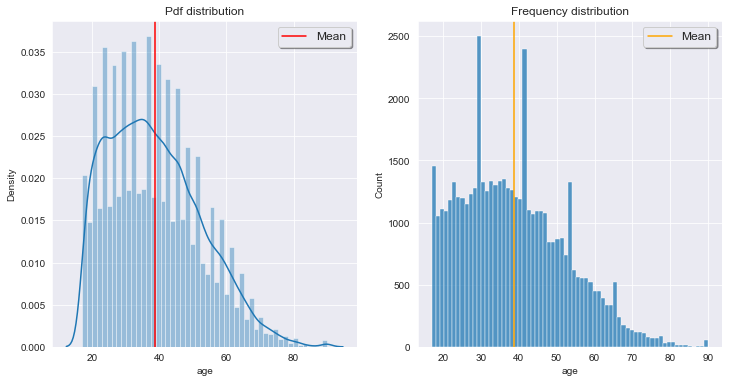

In [14]:
distr_plot('age')

we can observe that the age plot contains a tail towards right that indicates skewness of data,skew value indicates positively right skewed

<h4 style="color: blue">fnlwgt  data distribution:</h4>

Skewness:1.44
Kurtosis:6.06


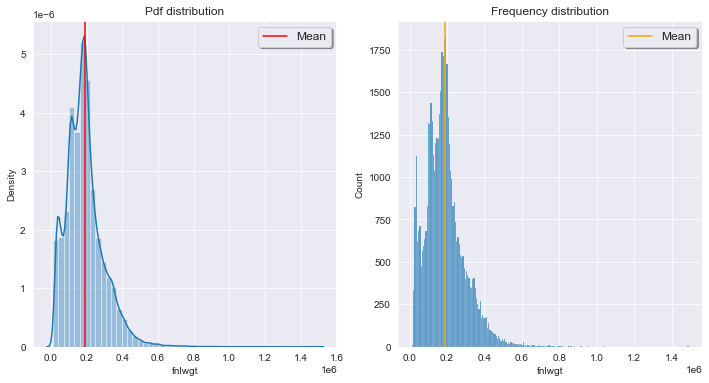

In [15]:
distr_plot('fnlwgt')

we can observe that the fnlwgt plot contains a long tail towards right that indicates skewness of data,skew value indicates positively right skewed and is a log normal distribution

<h4 style="color: blue">educational-num  data distribution:</h4>

Skewness:-0.32
Kurtosis:0.63


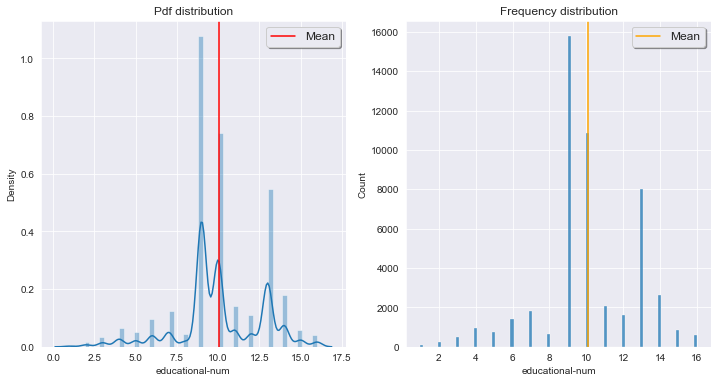

In [16]:
distr_plot('educational-num')

we can observe that the educational-num plot has not properly able to distribute the plot over the data and this is an uneven plot that cannot be infered

<h4 style="color: blue">capital-gain  data distribution:</h4>

Skewness:11.89
Kurtosis:152.69


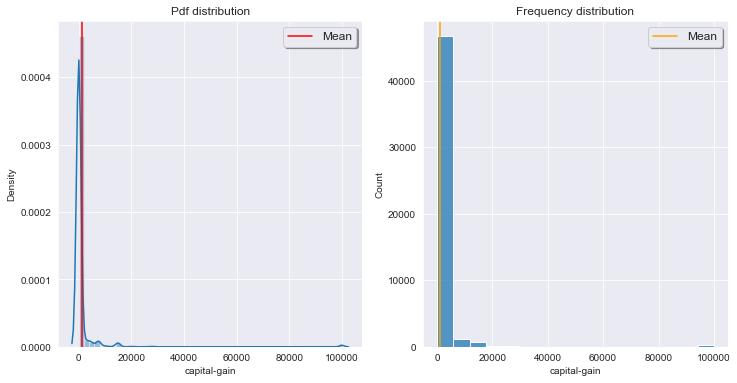

In [17]:
distr_plot('capital-gain')

we can observe that the capital gain data is highely positively right skewed from the plot and it is a pareto distribution

<h4 style="color: blue">capital-loss  data distribution:</h4>

Skewness:4.57
Kurtosis:20.01


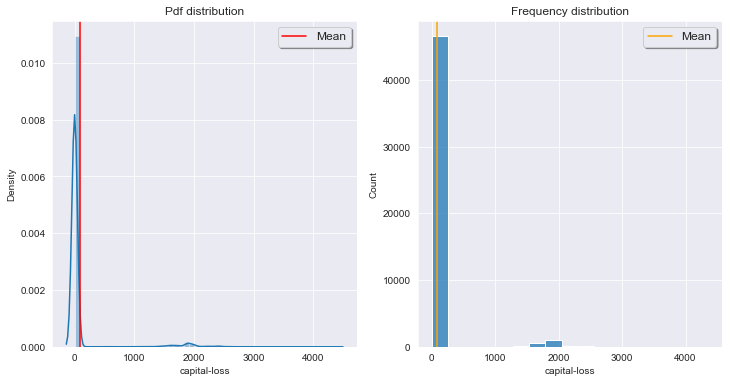

In [18]:
distr_plot('capital-loss')

we can observe that the capital loss data is highely positively right skewed from the plot and it is a pareto distribution

<h4 style="color: blue">hours-per-week data distribution:</h4>

Skewness:0.24
Kurtosis:2.95


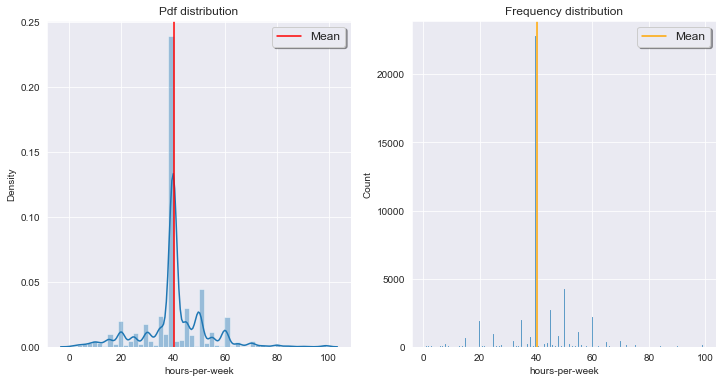

In [19]:
distr_plot('hours-per-week')

we can observe that the hours-per-week plot has not properly able to distribute the data over the plot and this is an uneven plot that cannot be infered

In [20]:
#getting all the categorical columns 
cat_df = df.select_dtypes(include=['object'])

In [21]:
cat_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [22]:
len(cat_df.columns)

9

There are 9 categorical columns in the data

<h3 style="color: blue">workclass data distribution:</h3>

In [23]:
unique_workclass = df['workclass'].unique()
unique_workclass

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [24]:
len(unique_workclass) 

9

In [25]:
workclass_count = df['workclass'].value_counts()
workclass_count

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

contain a ? value which is not the vaild value of the worldclass  

Text(0.5, 1.0, 'countplot')

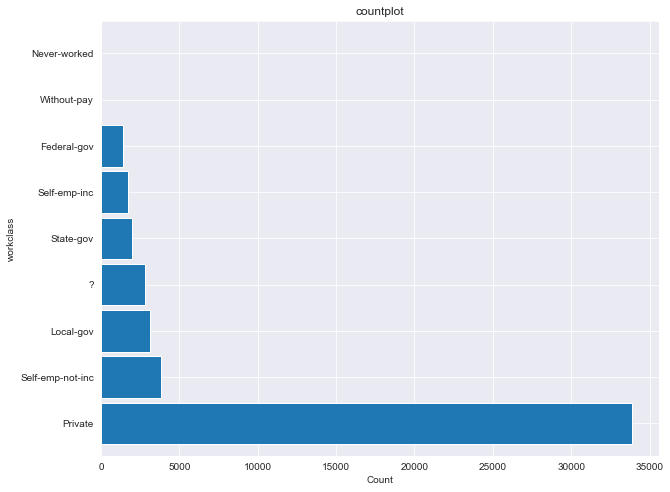

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
workclass_count.plot(kind='barh' , width=0.9)
plt.ylabel('workclass')
plt.xlabel('Count')
plt.title("countplot")

From the above plot we can observe that majority of Workclass belongs to the Private Sector and very few percent of Workclass belongs to other categories.

<h3 style="color: blue">education data distribution:</h3>

In [27]:
unique_education = df['education'].unique()
unique_education

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [28]:
len(unique_education)

16

In [29]:
education_count = df['education'].value_counts()
education_count

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Text(0.5, 0, 'Count')

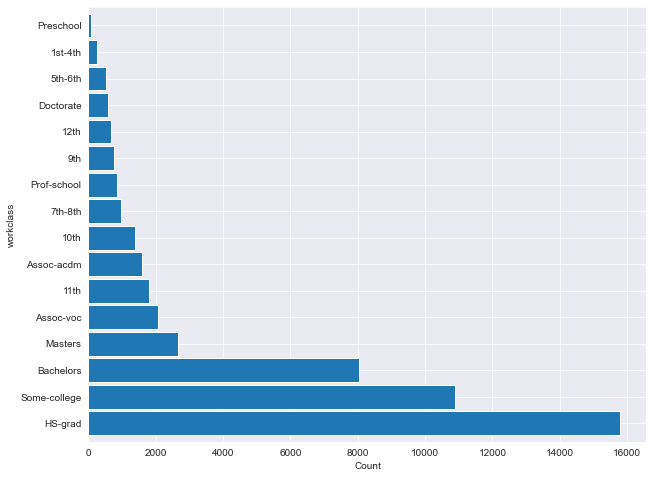

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
education_count.plot(kind='barh' , width=0.9)
plt.ylabel('workclass')
plt.xlabel('Count')


From the above plot we can observe that Highest Education of an Individual is HS-grad,followed by some-college.

<h3 style="color: blue">marital-status  data distribution:</h3>

In [31]:
unique_maritalstatus = df['marital-status'].unique()
len(unique_maritalstatus) 

7

In [32]:
maritalstatus_count = df['marital-status'].value_counts()
maritalstatus_count

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Text(0.5, 0, 'Count')

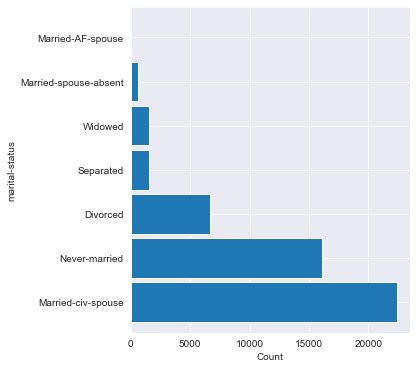

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,6))
maritalstatus_count.plot(kind='barh' , width=0.9)
plt.ylabel('marital-status')
plt.xlabel('Count')

From the above plot we can observe that Married-civ-spouse are more in number in the population

<h3 style="color: blue">occupation data distribution:</h3>

In [34]:
unique_occupation = df['occupation'].unique()
len(unique_occupation) 

15

In [35]:
occupation_count = df['occupation'].value_counts()
occupation_count

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Text(0.5, 0, 'Count')

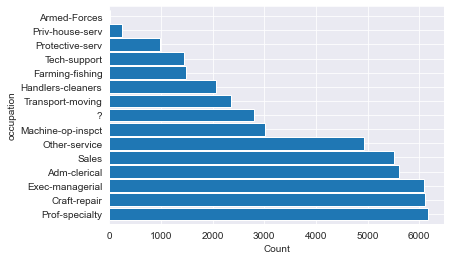

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
occupation_count.plot(kind='barh' , width=0.9)
plt.ylabel('occupation')
plt.xlabel('Count')

From the above plot we can observe that the Prof-specialty is the most common occupation in the population

<h3 style="color: blue">relationship data distribution:</h3>

In [37]:
unique_relationship = df['relationship'].unique()
len(unique_relationship) 

6

In [38]:
relationship_count = df['relationship'].value_counts()
relationship_count

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Text(0.5, 0, 'Count')

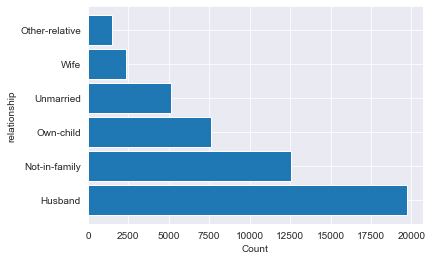

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
relationship_count.plot(kind='barh' , width=0.9)
plt.ylabel('relationship')
plt.xlabel('Count')

<h3 style="color: blue">race data distribution:</h3>

In [40]:
unique_race = df['race'].unique()
len(unique_race) 

5

In [41]:
race_count = df['race'].value_counts()
race_count

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Text(0.5, 0, 'Count')

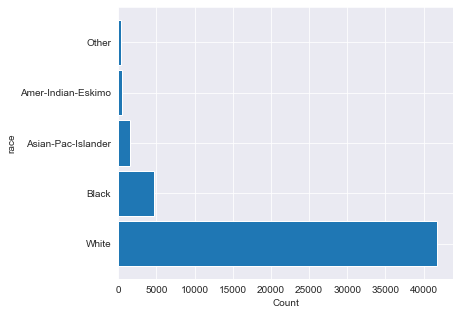

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,5))
race_count.plot(kind='barh' , width=0.9)
plt.ylabel('race')
plt.xlabel('Count')

From the above plot we can observe that most of population are white

<h3 style="color: blue">gender data distribution:</h3>

In [43]:
unique_gender = df['gender'].unique()
len(unique_gender) 

2

In [44]:
gender_count = df['gender'].value_counts()
gender_count

Male      32650
Female    16192
Name: gender, dtype: int64

In [45]:
m =gender_count[0]/df['gender'].count()*100
f = gender_count[1]/df['gender'].count()*100

In [46]:
f_df = pd.DataFrame({'Percentage':[m,f]},index=['male%','female%'])
f_df.style.background_gradient(cmap='icefire')

,Percentage
male%,66.848204
female%,33.151796


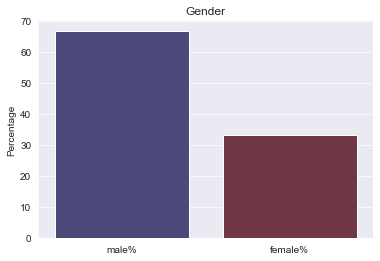

In [47]:
plt.title("Gender")
sns.barplot(x=f_df.index,y=f_df['Percentage'],palette='icefire')
plt.show()

<h3 style="color: blue">native-country data distribution:</h3>

In [48]:
unique_native_country = df['native-country'].unique()
len(unique_native_country) 

42

In [49]:
native_country_count = df['native-country'].value_counts()
native_country_count

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Text(0.5, 0, 'Count')

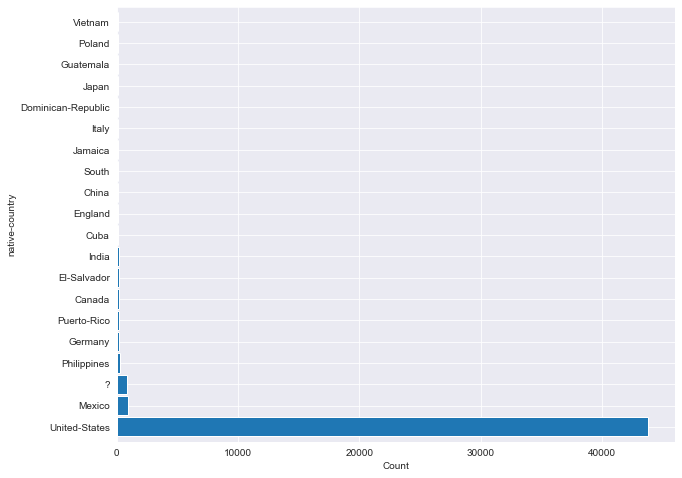

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
native_country_count[:20].plot(kind='barh' , width=0.9)
plt.ylabel('native-country')
plt.xlabel('Count')

native country is mostly USA

<h3 style="color: blue">income  data distribution:</h3>

In [51]:
unique_income = df['income'].unique()
len(unique_income) 

2

In [52]:
income_count = df['income'].value_counts()
income_count

<=50K    37155
>50K     11687
Name: income, dtype: int64

Text(0.5, 0, 'Count')

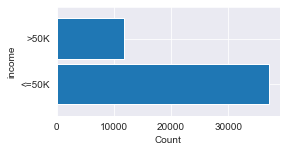

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize=(4,2))
income_count.plot(kind='barh' , width=0.9)
plt.ylabel('income')
plt.xlabel('Count')

From the plot we can observe that income for the majority of population is less than or equal to 50k

<h3 style="color:blue">Bivariate Analysis:</h3>

<h4 style="color:blue">Bivariate analysis of Workclass and Age:</h4>

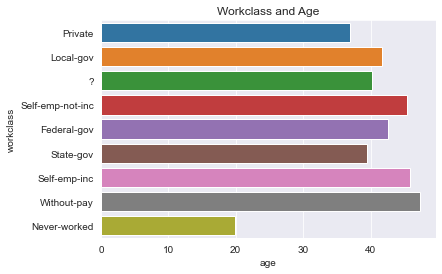

In [54]:
plt.figure(figsize=(6,4))
sns.barplot(y='workclass',x='age',data=df,ci = None)
plt.title('Workclass and Age')
plt.show()

from the above plot we can observe that people with age >40 are mostly working without pay

<h4 style="color:blue">Bivariate analysis of Marital Status and Age :</h4>

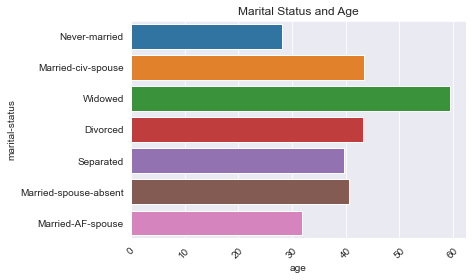

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(y='marital-status',x='age',ci=None,data=df)
plt.title('Marital Status and Age')
plt.xticks(rotation=45)
plt.show()

<h4 style="color:blue">Bivariate analysis of Income and age:</h4>

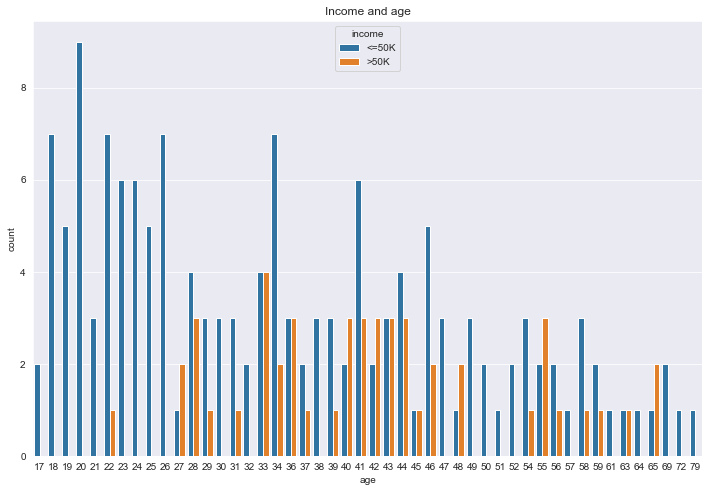

In [56]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x=df['age'][:200],hue='income',data=df)
plt.title('Income and age')
plt.show()

we can observe that most of the population earn <=50k 

<h4 style="color:blue">Bivariate analysis of Income and Relationship  :</h4>

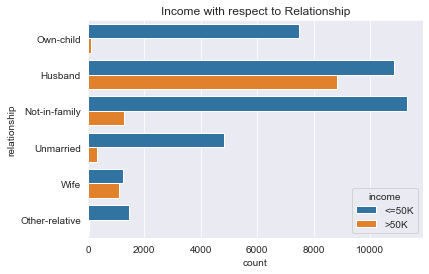

In [57]:
plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.countplot(y='relationship',hue='income',data=df)
plt.title('Income with respect to Relationship')
plt.show()

<h4 style="color:blue">Bivariate analysis of  Occupation and Income :</h4>

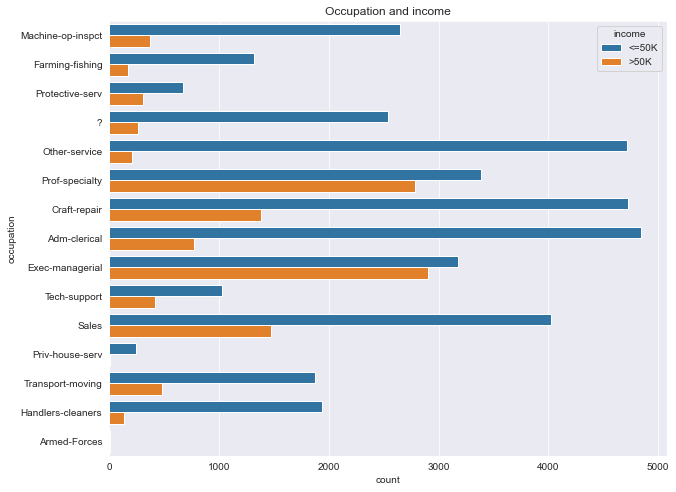

In [58]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.countplot(y='occupation',hue='income',data=df)
plt.title('Occupation and income')
plt.show()

<h4 style="color:blue">Bivariate analysis  Occupation  and Age :</h4>

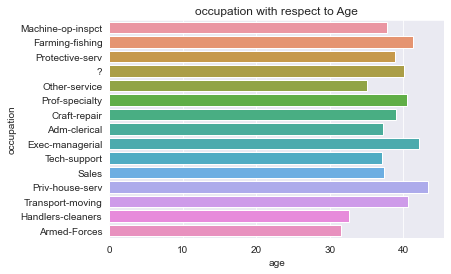

In [59]:
plt.figure(figsize=(6,4))
sns.barplot(y='occupation',x='age',ci=None,data=df)
plt.title('occupation with respect to Age')
plt.show()

<h4 style="color:blue">Bivariate analysis Income and Education Level:</h4>

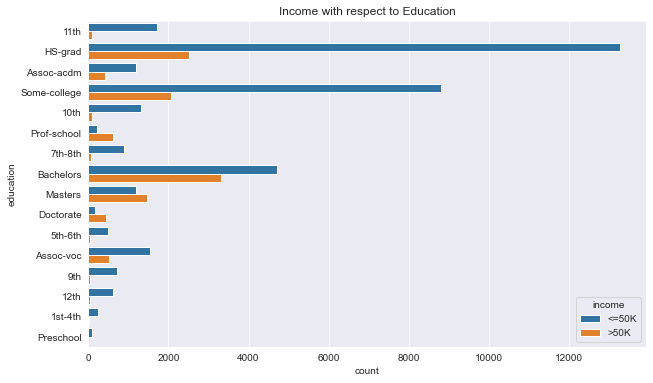

In [60]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(y='education',hue='income',data=df)
plt.title('Income with respect to Education')
plt.show()

<h4 style="color:blue">Handling the invalid values/missing values:using Feature engineering techniques</h4>

In [61]:
#replacing '?' with nan
columns = list(df.columns)
for col in columns:    
    df[col] = df[col].replace('?',np.nan)

In [62]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

we can observe that there a null values in the dataset

In [63]:
# Dropping the null values
df = df.loc[df['workclass'].notnull(),:]
df = df.loc[df['occupation'].notnull(),:]
df = df.loc[df['native-country'].notnull(),:]

In [64]:
df.isnull().sum() 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [65]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [66]:
#dropping unnecessary columns
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [67]:
#To create dummy values to income column
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [68]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-country'

In [69]:
df.loc[df['race'] != 'White', 'race'] = 'Other'

In [70]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,low
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,low
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,high
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,40,United-States,high
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,low


In [71]:
outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage'])
num_data = df.select_dtypes(['int64','float64']).columns   
for column in list(num_data): 
   
    q1 = df[column].quantile(0.25)  # first quartile
    q3 = df[column].quantile(0.75)  # third quartile
            
    iqr = q3 - q1 #Inter Quantile Range
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
     
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)

In [72]:
outliers

,Feature,Number of Outliers,Percentage
0,age,269,0.594843
1,educational-num,294,0.650126
2,hours-per-week,11899,26.312414


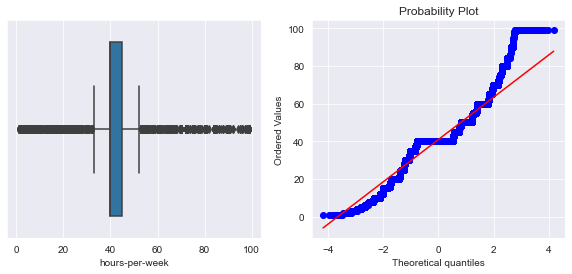

In [73]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.subplot(1, 2, 2)
sns.set_style('darkgrid')
stats.probplot(df['hours-per-week'],dist='norm', plot=plt)
plt.show()

hours-per-week contain high no of outliers

<h4 style="color:blue">Applying box-cox transformation on hours-per-week column</h4

In [74]:
data , lamba = stats.boxcox(df['hours-per-week'])
print(lamba)

0.957404248835031


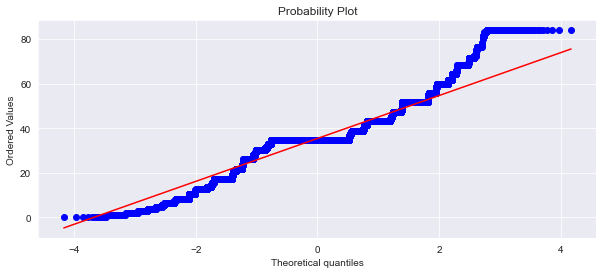

In [75]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
stats.probplot(data , dist='norm' , plot=plt)
plt.show()

box-cox transformation has not worked on the column

<h4 style="color:blue">Applying Median Imputation on  hours-per-week</h4>

In [76]:
q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
median_ = np.median(df['hours-per-week'])
for i in df['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, median_)

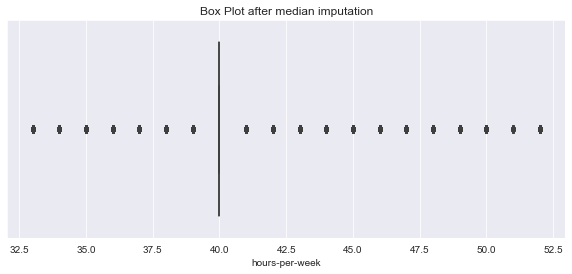

In [77]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after median imputation")
plt.show()

<h4 style="color:blue">Conclusion</h4>

- all the outliers are treated
- all the missing and invaild values are handled
- handled the skewed data in the dataset

<h4 style="color:blue">Feature Transformation:</h4>

<h4 style="color:blue">Standardization of Numerical Features:</h4>

In [78]:
print('Numerical Columns : {}'.format(list(num_data)))

Numerical Columns : ['age', 'educational-num', 'hours-per-week']


In [79]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

,age,educational-num,hours-per-week
0,0.109589,0.400000,0.368421
1,0.287671,0.533333,0.894737
2,0.150685,0.733333,0.368421
3,0.369863,0.600000,0.368421
4,0.232877,0.333333,0.368421


<h4 style="color:blue">Standardization of Categorical Features:</h4>

In [81]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [82]:
categorical = df.select_dtypes('object')
df_categorical = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_categorical.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [83]:
df1 = pd.concat([df_numerical,df_categorical], axis = 1)
df1.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.232877,0.333333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


<h3 style="color:blue">Modeling</h3>

In [84]:
#splitting data
x = df1.iloc[:,:-1] 
y = df1.iloc[:,-1] 

In [85]:
x

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.232877,0.333333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.136986,0.733333,0.263158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
45218,0.315068,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
45219,0.561644,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
45220,0.068493,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [86]:
y

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
45217    1.0
45218    0.0
45219    1.0
45220    1.0
45221    0.0
Name: income_low, Length: 45222, dtype: float64

In [87]:
#splitting data into train set and test set
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3)

<h3 style= "color:blue">LogisticRegression</h3>

In [88]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(x_train, y_train)

y_pred_logistic = Logistic_model.predict(x_test)

from sklearn import metrics

Logistic_Accuracy= round(metrics.accuracy_score(y_test, y_pred_logistic),2)*100

Logistic_Accuracy

82.0

<h3 style= "color:blue">DecisionTreeClassifier</h3>

In [89]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(criterion='entropy',random_state=0)

dtc_model.fit(x_train,y_train)

y_pred_dtc = dtc_model.predict(x_test)

dtc_Accuracy = round(metrics.accuracy_score(y_test, y_pred_dtc),2)*100

dtc_Accuracy

78.0

<h3 style= "color:blue">K Nearest Neighbour Classifier:</h3>

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train,y_train)

y_pred_knn=knn_model.predict(x_test)

Knn_Accuracy = round(knn_model.score(x_test,y_test),2)*100

Knn_Accuracy

81.0

<h3 style= "color:blue">RandomForestClassifier</h3>

In [91]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)

y_pred_RF = RF_model.predict(x_test)

RF_Accuracy = round(RF_model.score(x_test,y_test),2)*100

RF_Accuracy

81.0

<h3 style= "color:blue">Extra Tree Classifier:</h3>

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=0)

ETC_model.fit(x_train, y_train)

y_pred_ETC = ETC_model.predict(x_test)

ETC_Accuracy = round(ETC_model.score(x_test,y_test),2)*100

ETC_Accuracy

80.0

<h3 style= "color:blue">Gradient Boosting Classifier:</h3>

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state = 0)

GBC_model.fit(x_train, y_train)

GBC_Accuracy = round(GBC_model.score(x_test,y_test),2)*100

GBC_Accuracy

83.0

<h3 style= "color:blue">Model performance:</h3>

In [94]:
models = {
    'Logistic Regression':Logistic_Accuracy,
    'DecisionTreeClassifier':dtc_Accuracy,
    'KNeighborsClassifier':Knn_Accuracy,
    'RandomForestClassifier':RF_Accuracy,
    'ExtraTreesClassifier':ETC_Accuracy,
    'GradientBoostingClassifier':GBC_Accuracy,
}

models_score = pd.DataFrame.from_dict(data = models, orient='index',columns=['Accuracy_score'])

models_score.sort_values(by='Accuracy_score', ascending=False)

,Accuracy_score
GradientBoostingClassifier,83.0
Logistic Regression,82.0
KNeighborsClassifier,81.0
RandomForestClassifier,81.0
ExtraTreesClassifier,80.0
DecisionTreeClassifier,78.0
